# 読売３３３の評価

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename = 'report_yomiuri333.ods'
df = pd.read_excel(filename, index_col=0)
df.index = pd.to_datetime(df.index)
df.tail(10)

,日経225（終値）,TOPIX（終値）,読売333
Date,,,
2025-05-22,36985.87,2717.09,34723.39
2025-05-23,37160.47,2735.52,34912.71
2025-05-26,37531.53,2751.91,35096.51
2025-05-27,37724.11,2769.49,35262.70
2025-05-28,37722.40,2769.51,35253.60
2025-05-29,38432.98,2812.02,35554.89
2025-05-30,37965.10,2801.57,35564.81
2025-06-02,37470.67,2777.29,35371.51
2025-06-03,37446.81,2771.11,35366.47


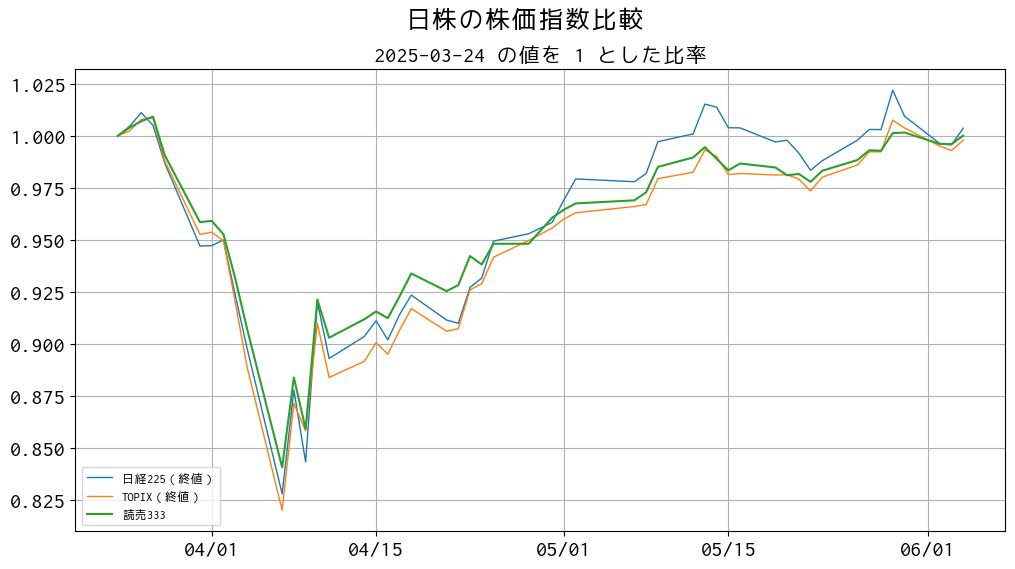

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

for colname in df.columns:
    ser = df[colname] / df[colname].iloc[0]
    if colname == '読売333':
        lw = 1.5
    else:
        lw = 1
    ax.plot(ser, label=colname, linewidth=lw)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

fig.suptitle('日株の株価指数比較')
ax.set_title('2025-03-24 の値を 1 とした比率', fontsize=16)
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.savefig('report_yomiuri333.png' )
plt.show()